In [6]:
# http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/
import pandas as pd

df = pd.read_excel(r'C:\Users\ASUS\Cohort_Analysis\chapter-12-relay-foods.xlsx', sheetname = 1)

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

In [17]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000851E6A0>]], dtype=object)

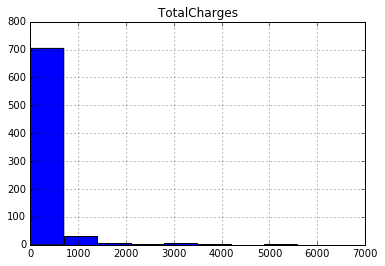

In [13]:
df.groupby(['UserId'])[['TotalCharges']].sum().hist()

In [18]:
#so we want to establish a cohort
#create a period column based on orderDate

df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [21]:
df.set_index('UserId', inplace = True) #assign UserId as index because we will group by this index later on and then we'll reset
df.head()

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
UserId,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02


In [26]:
df['CohortGroup'] = df.groupby(level = 0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.head()
# level 0 means we group by the first index(UsrId in this case)
#since we define the cohort as the date start of User o Minimum OrderDate

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
UserId,,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [27]:
# need to reset the index, see above results
df.reset_index(inplace = True)
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [71]:
# Rollup by CohortGroup and OrderPeriod
# create a groupby object
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

In [72]:
# calculate stats per cohort
cohorts = grouped.agg({'UserId': pd.Series.nunique,
                      'OrderId': pd.Series.nunique,
                      'TotalCharges':np.sum})

# make the column names more meaningful
cohorts.rename(columns={'UserId': 'TotalUsers',
                        'OrderId': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalCharges  TotalOrders
CohortGroup OrderPeriod                                       
2009-01     2009-01              22      1850.255           30
            2009-02               8      1351.065           25
            2009-03              10      1357.360           26
            2009-04               9      1604.500           28
            2009-05              10      1575.625           26

In [73]:
# label cohort period for each cohort group, 1 for the first month, 2 for 2nd etc

def cohort_period(df):
    """
    input is a cohort grouped dataframe
    """
    df['CohortPeriod'] = np.arange(len(df))+1
    return(df)


In [74]:
np.arange(3)
# if length of cohort group 1 is 15 then np.arange(len(df)) produces an array from 0 to len(df)

array([0, 1, 2])

In [75]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(20)

TotalUsers  TotalCharges  TotalOrders  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22     1850.2550           30             1
            2009-02               8     1351.0650           25             2
            2009-03              10     1357.3600           26             3
            2009-04               9     1604.5000           28             4
            2009-05              10     1575.6250           26             5
            2009-06               8     1384.8400           26             6
            2009-07               8     1750.8400           24             7
            2009-08               7     1426.5714           21             8
            2009-09               7     1964.2755           24             9
            2009-10               7      860.3292           13            10
            2009-11               7     1821.8153           21            11
            2009-12               8     2152.1165           22            12
            2010-01              11     2084.2236           25            13
            2010-02               7     2068.7771           19            14
            2010-03               6     1504.3325           12            15
2009-02     2009-02              15      666.3100           15             1
            2009-03               3      501.6100            8             2
            2009-04               5      968.7800           10             3
            2009-05               1       53.3600            2             4
            2009-06               4      758.5200            9             5

**Let's test if we did all right**

In [61]:
x = df[(df.CohortGroup == '2009-01') & (df.OrderPeriod == '2009-01')]
y = cohorts.ix[('2009-01', '2009-01')]

print(assert(x['UserId'].nunique() == y['TotalUsers']))
print(assert(x['TotalCharges'].sum() == y['TotalCharges']))
print(assert(x['OrderId'].nunique() == y['TotalOrders']))

x = df[(df.CohortGroup == '2009-01') & (df.OrderPeriod == '2009-09')]
y = cohorts.ix[('2009-01', '2009-09')]

print(assert(x['UserId'].nunique() == y['TotalUsers']))
print(assert(x['TotalCharges'].sum() == y['TotalCharges']))
print(assert(x['OrderId'].nunique() == y['TotalOrders']))

x = df[(df.CohortGroup == '2009-05') & (df.OrderPeriod == '2009-09')]
y = cohorts.ix[('2009-05', '2009-09')]

print(assert(x['UserId'].nunique() == y['TotalUsers']))
print(assert(x['TotalCharges'].sum() == y['TotalCharges']))
print(assert(x['OrderId'].nunique() == y['TotalOrders']))

SyntaxError: invalid syntax (<ipython-input-61-5c2e33e9bde1>, line 4)

User Retention by Cohort Group: We want to look at the percentage change
> create first a pandas series for each cohort group and size

In [76]:
cohorts.reset_index(inplace=True)

In [77]:
cohorts.head()

,CohortGroup,OrderPeriod,TotalUsers,TotalCharges,TotalOrders,CohortPeriod
0,2009-01,2009-01,22,1850.255,30,1
1,2009-01,2009-02,8,1351.065,25,2
2,2009-01,2009-03,10,1357.360,26,3
3,2009-01,2009-04,9,1604.500,28,4
4,2009-01,2009-05,10,1575.625,26,5


In [78]:
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace = True)
cohorts.head()

OrderPeriod  TotalUsers  TotalCharges  TotalOrders
CohortGroup CohortPeriod                                                   
2009-01     1                2009-01          22      1850.255           30
            2                2009-02           8      1351.065           25
            3                2009-03          10      1357.360           26
            4                2009-04           9      1604.500           28
            5                2009-05          10      1575.625           26

In [79]:
# cohort size is defined by the first number of users
# sinc we are actually getting the retention rate changes of the number of user in a cohort
# i.e number of users that registered on the same date
cohort_group_size = cohorts['TotalUsers'].groupby(level = 0).first()
cohort_group_size.head(8)

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
2009-06    32
2009-07    50
2009-08    31
Name: TotalUsers, dtype: int64

Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. Since DataFrame operations are performed based on the indices of the objects, we'll use unstack on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row is the CohortPeriod corresponding to that group.


**We need to divide so as the know the proportion of users on a certain period**

**retention = (# of users in period i)/(Cohort size)**

In [81]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2009-01      1               22
             2                8
             3               10
             4                9
             5               10
Name: TotalUsers, dtype: int64

In [86]:
transpose = cohorts['TotalUsers'].unstack(0)
transpose

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN
6,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
7,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.0,5.0,2.0,2.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
print(cohort_group_size.shape)
print(transpose.shape)

(15,)
(15, 15)


In [89]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis = 1)
# axis = 1 means columns so in effect
# the transposed table will be divided along the columns
# i.e broadcasted 
user_retention

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can now plot the retention rates!

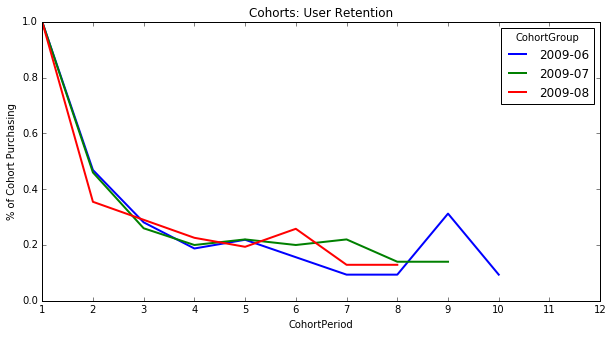

In [91]:
user_retention[['2009-06', '2009-07', '2009-08']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

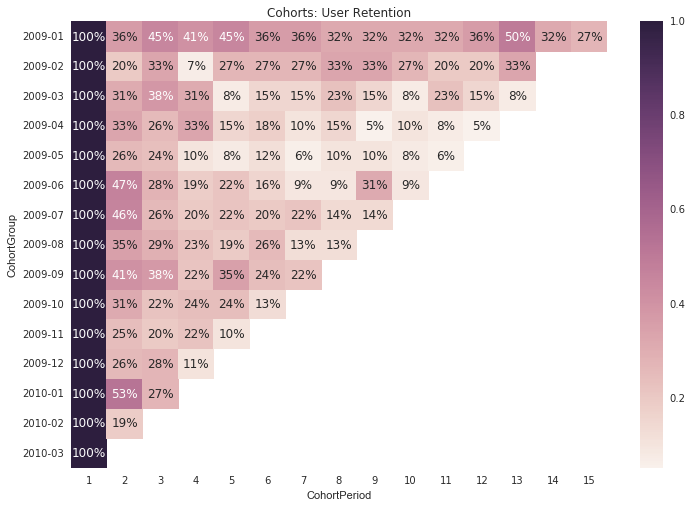

In [94]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');